# Setup
We need datasets, dataloaders, and code to train and evaluate models

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
from models import *
from data_structures import *
from helpers import load_from_hdf5

In [3]:
X, y = load_from_hdf5(filename="../../engine_final_scaled.h5")

In [4]:
y_hs = X[:, 0, 44]
X = X[:, :, :44]
print(y_hs.shape)
print(X.shape)
print(y.shape)

(500000,)
(500000, 50, 44)
(500000,)


In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# 1d CNN
First, let's try a one dimensional CNN to capture temporal relationships within each feature.

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

Train set size: 400000, Test set size: 100000


In [7]:
num_feats = 44
model = CNNRULRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20 
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 585.0929, Test Loss: 207.0237
Epoch 2/20, Train Loss: 111.5425, Test Loss: 99.4622
Epoch 3/20, Train Loss: 96.0884, Test Loss: 93.5042
Epoch 4/20, Train Loss: 90.5469, Test Loss: 87.9529
Epoch 5/20, Train Loss: 85.3175, Test Loss: 84.1862
Epoch 6/20, Train Loss: 80.5278, Test Loss: 78.3959
Epoch 7/20, Train Loss: 76.0247, Test Loss: 73.8195
Epoch 8/20, Train Loss: 72.1017, Test Loss: 70.2100
Epoch 9/20, Train Loss: 68.5156, Test Loss: 66.4956
Epoch 10/20, Train Loss: 65.2090, Test Loss: 63.2617
Epoch 11/20, Train Loss: 62.1371, Test Loss: 60.1744
Epoch 12/20, Train Loss: 59.2859, Test Loss: 59.7496
Epoch 13/20, Train Loss: 56.7660, Test Loss: 55.9526
Epoch 14/20, Train Loss: 54.5092, Test Loss: 53.0049
Epoch 15/20, Train Loss: 52.7743, Test Loss: 51.3134
Epoch 16/20, Train Loss: 51.0715, Test Loss: 51.8512
Epoch 17/20, Train Loss: 49.7112, Test Loss: 48.2181
Epoch 18/20, Train Loss: 48.4800, Test Loss: 47.5568
Epoch 19/20, Train Loss: 47.2836, Test Loss: 46.8072

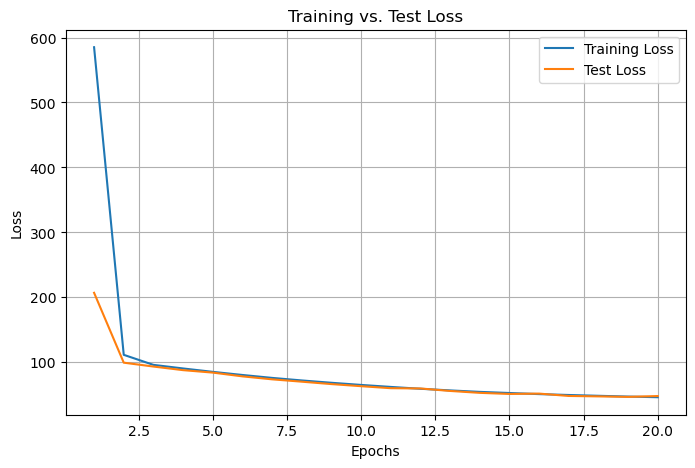

In [8]:
plot_loss(history)

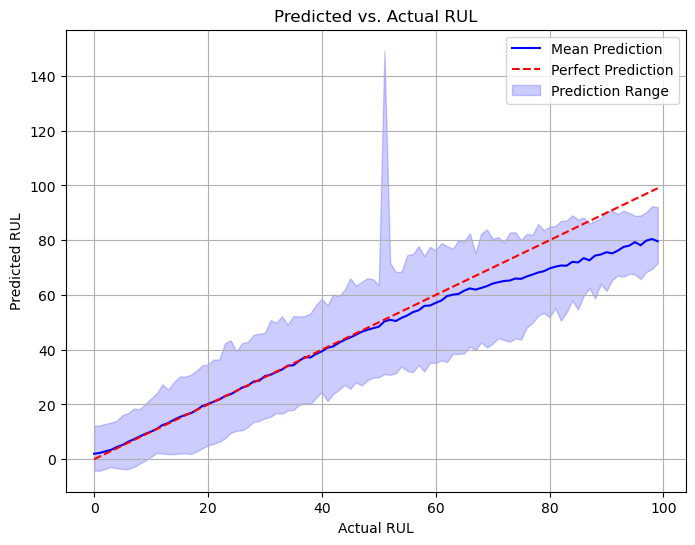

In [9]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [10]:
torch.save(model.state_dict(), 'state_dicts/baseline_state_dict.pth')

# 2d CNN
Now, let's try out a two dimensional CNN to capture interactions among features.

In [11]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [12]:
num_feats = 44
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20 

In [13]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 481.4951, Test Loss: 133.3896
Epoch 2/20, Train Loss: 110.5404, Test Loss: 101.1573
Epoch 3/20, Train Loss: 96.1761, Test Loss: 93.3354
Epoch 4/20, Train Loss: 88.3841, Test Loss: 85.1064
Epoch 5/20, Train Loss: 81.8370, Test Loss: 79.0464
Epoch 6/20, Train Loss: 75.9867, Test Loss: 74.2371
Epoch 7/20, Train Loss: 70.5496, Test Loss: 68.0125
Epoch 8/20, Train Loss: 65.6830, Test Loss: 63.4238
Epoch 9/20, Train Loss: 61.3310, Test Loss: 59.3950
Epoch 10/20, Train Loss: 57.5427, Test Loss: 55.9389
Epoch 11/20, Train Loss: 54.1231, Test Loss: 53.0500
Epoch 12/20, Train Loss: 51.1528, Test Loss: 49.8934
Epoch 13/20, Train Loss: 48.5926, Test Loss: 47.8963
Epoch 14/20, Train Loss: 46.3497, Test Loss: 45.3997
Epoch 15/20, Train Loss: 44.4562, Test Loss: 43.6229
Epoch 16/20, Train Loss: 42.8599, Test Loss: 42.2396
Epoch 17/20, Train Loss: 41.5427, Test Loss: 40.9136
Epoch 18/20, Train Loss: 40.3662, Test Loss: 39.9375
Epoch 19/20, Train Loss: 39.3116, Test Loss: 39.596

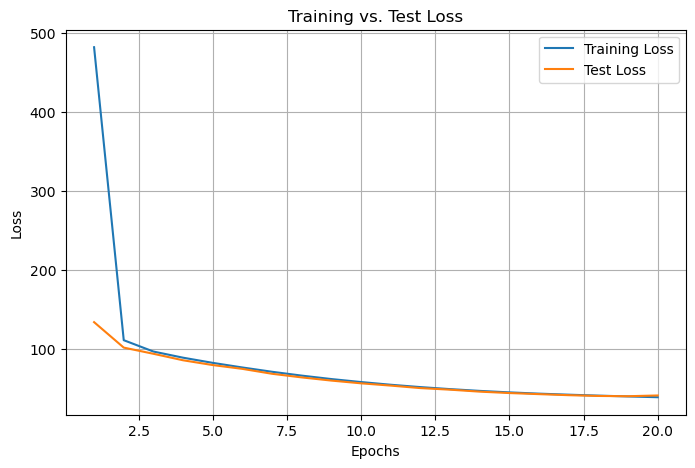

In [14]:
plot_loss(history)

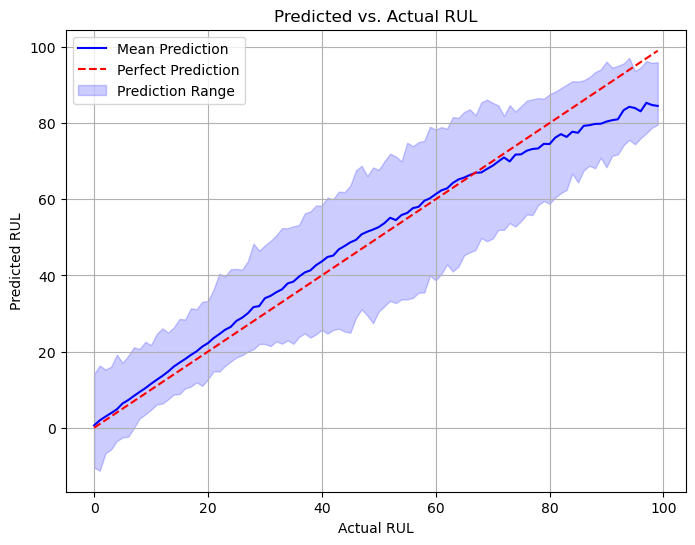

In [15]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [16]:
torch.save(model.state_dict(), 'state_dicts/2d_baseline_state_dict.pth')

# Hybrid CNN
Now, let's try a hybrid CNN that uses both 1d and 2d convolutions.

In [17]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

Train set size: 400000, Test set size: 100000


In [18]:
num_feats = 44
seq_length = 50  
model = HybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 414.8192, Test Loss: 154.9831
Epoch 2/20, Train Loss: 114.4205, Test Loss: 100.5858
Epoch 3/20, Train Loss: 94.7158, Test Loss: 90.1659
Epoch 4/20, Train Loss: 86.3942, Test Loss: 82.3945
Epoch 5/20, Train Loss: 79.5305, Test Loss: 75.9043
Epoch 6/20, Train Loss: 73.3605, Test Loss: 70.0486
Epoch 7/20, Train Loss: 67.9850, Test Loss: 64.9515
Epoch 8/20, Train Loss: 63.2206, Test Loss: 60.7965
Epoch 9/20, Train Loss: 59.1268, Test Loss: 56.7047
Epoch 10/20, Train Loss: 55.7703, Test Loss: 53.6872
Epoch 11/20, Train Loss: 53.1030, Test Loss: 51.3821
Epoch 12/20, Train Loss: 50.9560, Test Loss: 49.4698
Epoch 13/20, Train Loss: 49.3743, Test Loss: 48.4467
Epoch 14/20, Train Loss: 48.0740, Test Loss: 47.1024
Epoch 15/20, Train Loss: 47.0102, Test Loss: 46.4974
Epoch 16/20, Train Loss: 46.1387, Test Loss: 45.2280
Epoch 17/20, Train Loss: 45.4210, Test Loss: 45.8885
Epoch 18/20, Train Loss: 44.7998, Test Loss: 44.1483
Epoch 19/20, Train Loss: 44.2056, Test Loss: 43.419

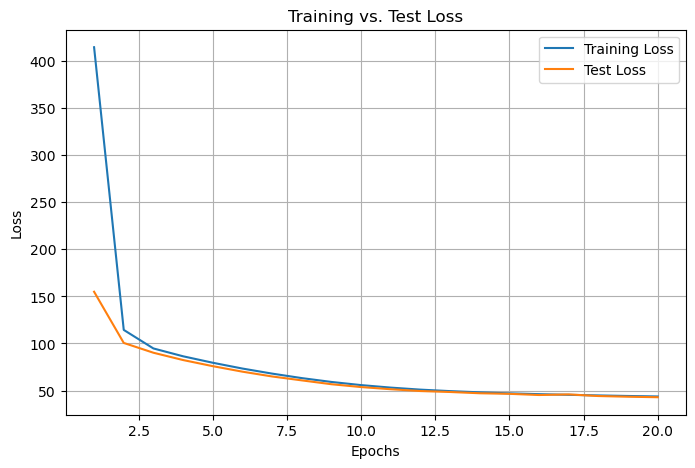

In [19]:
plot_loss(history)

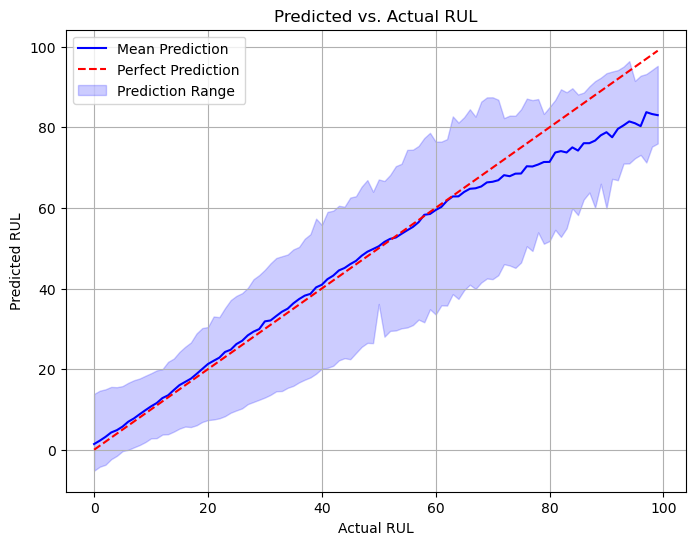

In [20]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [21]:
torch.save(model.state_dict(), 'state_dicts/hybrid_baseline_state_dict.pth')

# More Complex Hybrid Model
The simple hybrid model wasn't quite as performant as the 2D model, so let's try a slightly deeper hybrid model to see if we can get the benefits of our 1D and 2D models in one. Unfortunately, this model seriously overfit the training data and was not performant on the test data.

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

Train set size: 400000, Test set size: 100000


In [7]:
num_feats = 44
seq_length = 50  
model = ComplexHybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

In [8]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 842.2433, Test Loss: 609.4547
Epoch 2/20, Train Loss: 65.8450, Test Loss: 538.1121
Epoch 3/20, Train Loss: 51.6638, Test Loss: 508.3308
Epoch 4/20, Train Loss: 47.7789, Test Loss: 546.2581


KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)

In [ ]:
torch.save(model.state_dict(), 'state_dicts/complex_hybrid_state_dict.pth')

# 2D CNN with Custom Loss Function and ReLU on Final Layer
Now, let's try a 2D CNN that uses both 1d and 2d convolutions, this time with a custom loss function that penalizes overestimations more then underestimations. The 2D baseline was most performant, so that's the route we'll take. Ideally, we should see that the graph of actual versus predicted RULs shows fewer overesimates. Additionally, let's add ReLU activation to the output layer to avoid negative RUL estimates, which are practically impossible. 

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [7]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = AsymmetricHuberLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 21.5657, Test Loss: 12.9371
Epoch 2/20, Train Loss: 12.3063, Test Loss: 11.6893
Epoch 3/20, Train Loss: 11.2466, Test Loss: 10.7760
Epoch 4/20, Train Loss: 10.5199, Test Loss: 10.1822
Epoch 5/20, Train Loss: 9.9398, Test Loss: 9.6097
Epoch 6/20, Train Loss: 9.4492, Test Loss: 9.1948
Epoch 7/20, Train Loss: 9.0592, Test Loss: 9.1089
Epoch 8/20, Train Loss: 8.7233, Test Loss: 8.5455
Epoch 9/20, Train Loss: 8.4464, Test Loss: 8.2608
Epoch 10/20, Train Loss: 8.2119, Test Loss: 8.0621
Epoch 11/20, Train Loss: 8.0071, Test Loss: 7.9863
Epoch 12/20, Train Loss: 7.8014, Test Loss: 7.6710
Epoch 13/20, Train Loss: 7.6097, Test Loss: 7.5346
Epoch 14/20, Train Loss: 7.4482, Test Loss: 7.6493
Epoch 15/20, Train Loss: 7.2769, Test Loss: 7.7135
Epoch 16/20, Train Loss: 7.1209, Test Loss: 6.9715
Epoch 17/20, Train Loss: 6.9634, Test Loss: 6.8161
Epoch 18/20, Train Loss: 6.8276, Test Loss: 6.6711
Epoch 19/20, Train Loss: 6.6833, Test Loss: 6.5499
Epoch 20/20, Train Loss: 6.5713,

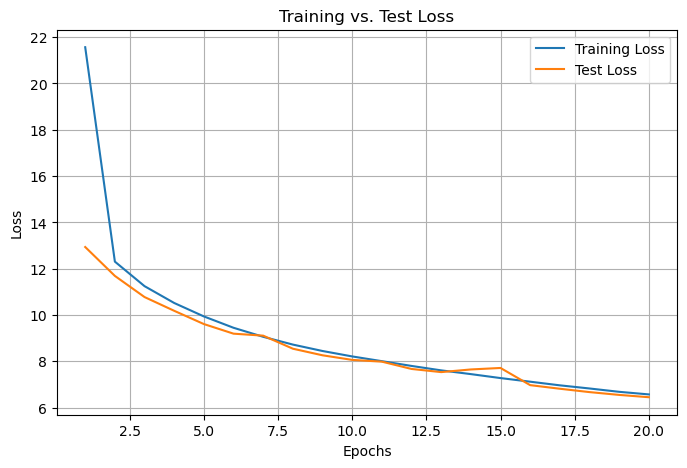

In [10]:
plot_loss(history)

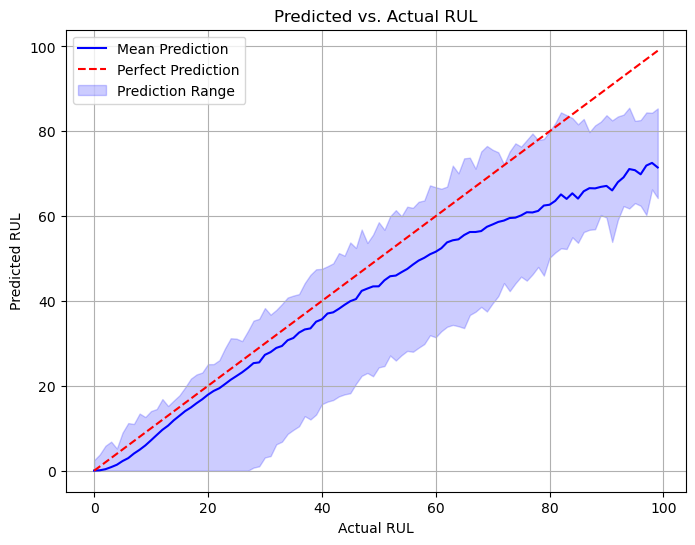

In [11]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [28]:
torch.save(model.state_dict(), 'state_dicts/custom_loss_state_dict.pth')

# Understanding Performance Differences for Healthy vs Unhealthy Engines
Healthy engines are much more prone to drastic underestimations as actual RUL increases. Unhealthy engines share this trend, but less so that healthy ones. Unhealthy engines tend to have pretty good predictions up until around 40 actual RUL. This seems to indicate that the model struggles around the boundary of healthy versus unhealthy engines and that the model struggles for both healthy and unhealthy engines as actual RUL increases. It is true that we'd rather have underestimates of RUL than overestimates, as is occuring. But, we still want to try to minimize these error trends.

Train set size: 109272, Test set size: 27319


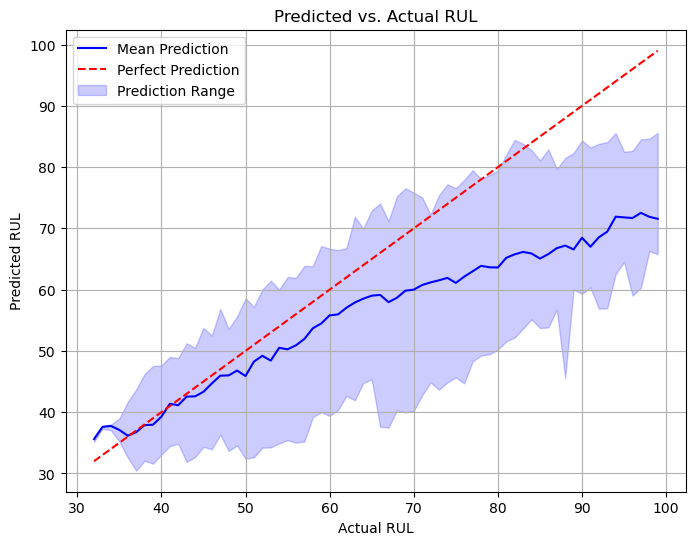

In [12]:
idxs = np.where(y_hs == 1)[0]
X_healthy = X[idxs]
y_healthy = y[idxs]
healthy_train_loader, healthy_test_loader = create_train_test_dataloaders(X_healthy, y_healthy, dim="2d")
plot_rul_predictions(model, healthy_test_loader, device, aggregate=True, shaded_region=True)

Train set size: 290727, Test set size: 72682


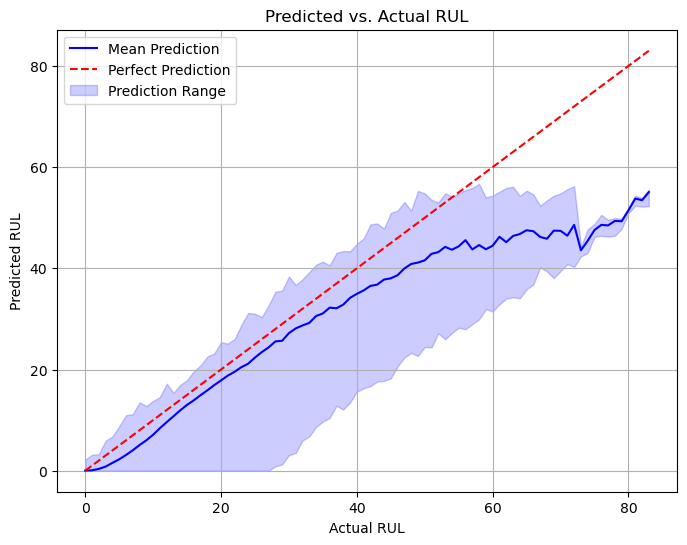

In [13]:
idxs = np.where(y_hs == 0)[0]
X_healthy = X[idxs]
y_healthy = y[idxs]
unhealthy_train_loader, unhealthy_test_loader = create_train_test_dataloaders(X_healthy, y_healthy, dim="2d")
plot_rul_predictions(model, unhealthy_test_loader, device, aggregate=True, shaded_region=True)

# 2D CNN with Custom Loss Function and ReLU on Final Layer for Healthy and Unhealthy Engines
Now, let's try the same 2D architecture as before for only healthy engines and then for only unhealthy engines and see if it is more performant than the original 2D model with custom loss.
### Healthy Engines

In [24]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = AsymmetricHuberLoss(beta=3) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00002)
num_epochs = 20

history = train_model(model, healthy_train_loader, healthy_test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 21.4343, Test Loss: 17.3375
Epoch 2/20, Train Loss: 17.3530, Test Loss: 17.2403
Epoch 3/20, Train Loss: 17.2284, Test Loss: 17.1619
Epoch 4/20, Train Loss: 16.9738, Test Loss: 16.7658
Epoch 5/20, Train Loss: 16.3891, Test Loss: 15.8364
Epoch 6/20, Train Loss: 15.4411, Test Loss: 14.9377
Epoch 7/20, Train Loss: 14.8705, Test Loss: 14.6392
Epoch 8/20, Train Loss: 14.6835, Test Loss: 14.4744
Epoch 9/20, Train Loss: 14.5216, Test Loss: 14.3140
Epoch 10/20, Train Loss: 14.3573, Test Loss: 14.1109
Epoch 11/20, Train Loss: 14.1667, Test Loss: 13.9097
Epoch 12/20, Train Loss: 13.9585, Test Loss: 13.7095
Epoch 13/20, Train Loss: 13.7182, Test Loss: 13.4424
Epoch 14/20, Train Loss: 13.4390, Test Loss: 13.1252
Epoch 15/20, Train Loss: 13.1437, Test Loss: 12.9795
Epoch 16/20, Train Loss: 12.8418, Test Loss: 12.5294
Epoch 17/20, Train Loss: 12.5165, Test Loss: 12.1702
Epoch 18/20, Train Loss: 12.2149, Test Loss: 12.1554
Epoch 19/20, Train Loss: 11.9204, Test Loss: 11.5721
Ep

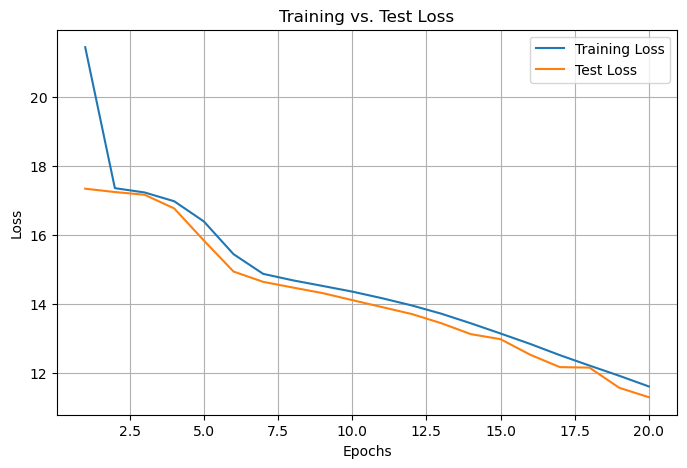

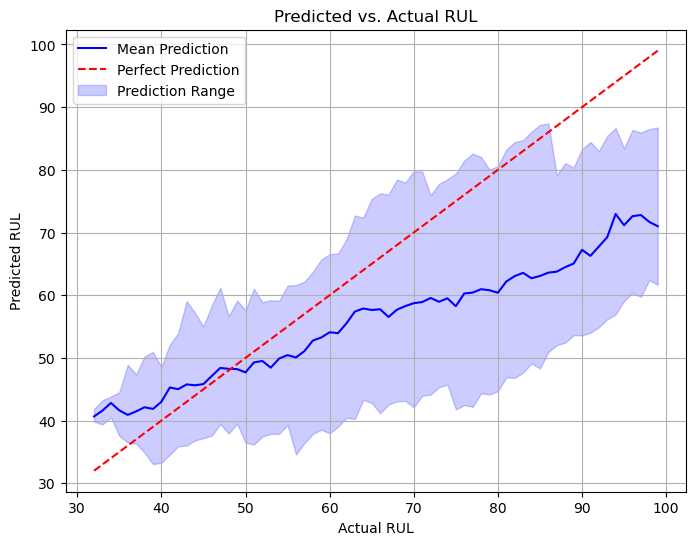

In [25]:
# after 20 epochs
plot_loss(history)
plot_rul_predictions(model, healthy_test_loader, device, aggregate=True, shaded_region=True)

In [28]:
torch.save(model.state_dict(), 'state_dicts/healthy_state_dict.pth')

### Unhealthy Engines

In [ ]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = AsymmetricHuberLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, unhealthy_train_loader, unhealthy_test_loader, criterion, optimizer, device, num_epochs=num_epochs)

In [ ]:
plot_loss(history)
plot_rul_predictions(model, healthy_test_loader, device, aggregate=True, shaded_region=True)

In [ ]:
torch.save(model.state_dict(), 'state_dicts/unhealthy_state_dict.pth')

# 2D CNN with Frequency Based Smoothing Asymmetric Custom Loss Function and ReLU on Final Layer for Healthy and Unhealthy Engines Together
Simply using the same architecture for healthy and unhealthy engines separately did not result in the desired model improvements. We still see good RUL prediction for low RUL values for unhealthy engines and substantial underestimates for both healthy and unhealthy engines as RUL increased. We still want to maintain the good RUL prediction with penalizing underestimates for low RUL values, but we also want to mitigate the underestimation of high RUL values within both healthy and unhealthy engines, and the overestimation of low RUL values for healthy engines. This might be because those tend to be underrepresented in the data. To address this, we can use a frequency based custom loss function that will still penalize underestimates more while also weighting loss by data frequency. 

penalize overestimates as RUL get larger. To do this, we need a new custom loss function that still penalized overestimates for low RUL values while penalizing underestimates as RUL increases. We will try out a smoothing asymmetric huber loss function. 

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [8]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
freq_map = {k:v for k, v in Counter(y).items()}
criterion = AdaptiveFrequencyAsymmetricHuberLoss(freq_map) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 212.9871, Test Loss: 151.1756
Epoch 2/20, Train Loss: 66.0602, Test Loss: 36.4059
Epoch 3/20, Train Loss: 31.6685, Test Loss: 28.2403
Epoch 4/20, Train Loss: 26.0072, Test Loss: 24.2745
Epoch 5/20, Train Loss: 22.5905, Test Loss: 21.0759
Epoch 6/20, Train Loss: 19.8009, Test Loss: 18.5289
Epoch 7/20, Train Loss: 17.6675, Test Loss: 16.6944
Epoch 8/20, Train Loss: 16.0654, Test Loss: 15.2533
Epoch 9/20, Train Loss: 14.7562, Test Loss: 14.0000
Epoch 10/20, Train Loss: 13.5675, Test Loss: 12.8343
Epoch 11/20, Train Loss: 12.4227, Test Loss: 11.7883
Epoch 12/20, Train Loss: 11.4202, Test Loss: 10.8878
Epoch 13/20, Train Loss: 10.5818, Test Loss: 10.0572
Epoch 14/20, Train Loss: 9.9200, Test Loss: 9.5708
Epoch 15/20, Train Loss: 9.3981, Test Loss: 9.0004
Epoch 16/20, Train Loss: 8.9640, Test Loss: 8.6263
Epoch 17/20, Train Loss: 8.5533, Test Loss: 8.4113
Epoch 18/20, Train Loss: 8.1689, Test Loss: 8.1542
Epoch 19/20, Train Loss: 7.8180, Test Loss: 7.4962
Epoch 20/20,

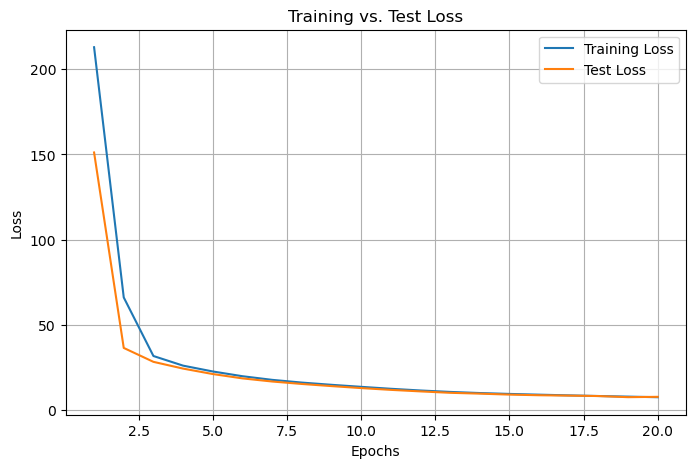

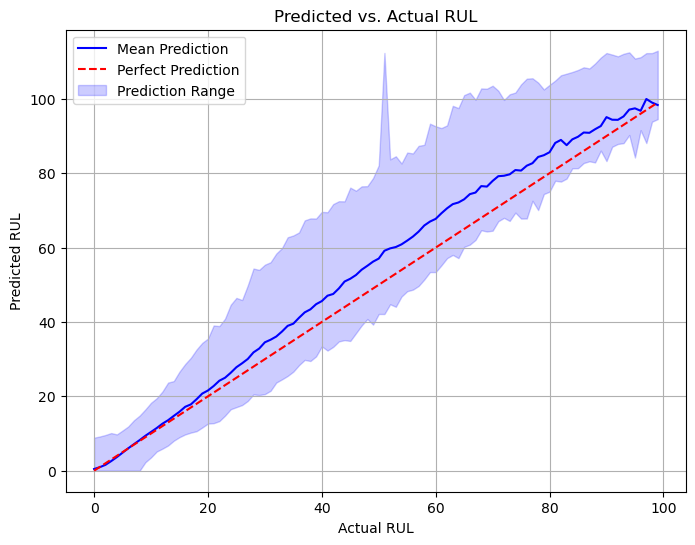

In [9]:
plot_loss(history)
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [10]:
torch.save(model.state_dict(), 'state_dicts/freq_asym_custom_loss_state_dict.pth')

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [7]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
freq_map = {k:v for k, v in Counter(y).items()}
criterion = AdaptiveFrequencyAsymmetricHuberLoss(freq_map) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 10

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/10, Train Loss: 199.0405, Test Loss: 77.3814
Epoch 2/10, Train Loss: 64.3845, Test Loss: 59.7551
Epoch 3/10, Train Loss: 56.3432, Test Loss: 53.8442
Epoch 4/10, Train Loss: 51.5733, Test Loss: 50.1688
Epoch 5/10, Train Loss: 48.4334, Test Loss: 47.4520
Epoch 6/10, Train Loss: 46.1241, Test Loss: 45.5053
Epoch 7/10, Train Loss: 44.1710, Test Loss: 43.4012
Epoch 8/10, Train Loss: 42.4245, Test Loss: 41.7346
Epoch 9/10, Train Loss: 40.9205, Test Loss: 40.4623
Epoch 10/10, Train Loss: 39.6384, Test Loss: 39.5817


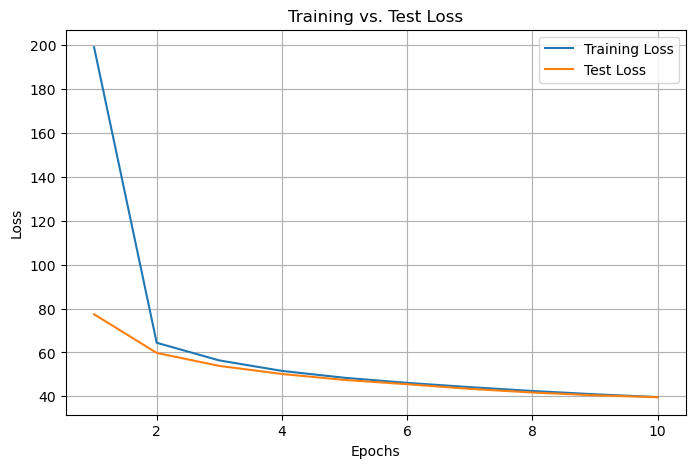

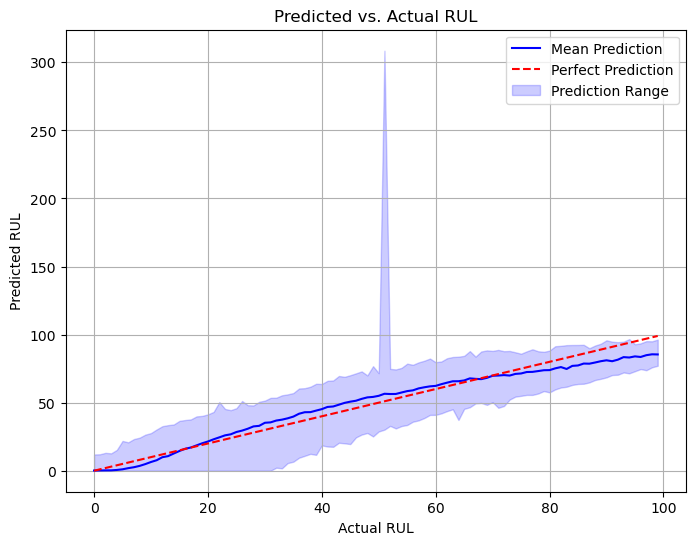

In [8]:
plot_loss(history)
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [9]:
torch.save(model.state_dict(), 'state_dicts/freq_asym_custom_loss_two_state_dict.pth')